In [67]:
# Environment utilities and setup
import shutil, sys, subprocess, os

def is_colab():
    try:
        import google.colab # type: ignore
        return True
    except ImportError:
        return False


def install_packages(packages):
    """Installs the given list of packages using conda if available, else pip."""
    if shutil.which("conda"):
        subprocess.check_call(["conda", "install", "-y"] + packages)
    else:
        subprocess.check_call([sys.executable, "-m", "pip", "install"] + packages)

# Note: Restart the kernel might be required if the some packages are just being installed
install_packages([
    "matplotlib>=3.10.0,<3.11.0",
    "numpy>=2.2.0,<2.3.0",
    "opencv-python>=4.12.0,<4.13.0",
    "scipy>=1.16.0,<1.17.0",
    "requests==2.32.5",
])

if is_colab():
    repo_url = "https://github.com/kaleabnega/Computer-Vision-Assignment-3.git"
    target_dir = "/content/project"
    !git clone {repo_url} {target_dir}
    %cd {target_dir}


os.makedirs("results", exist_ok=True)

In [68]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(1153.5), np.float64(783.5), np.float64(-0.5))

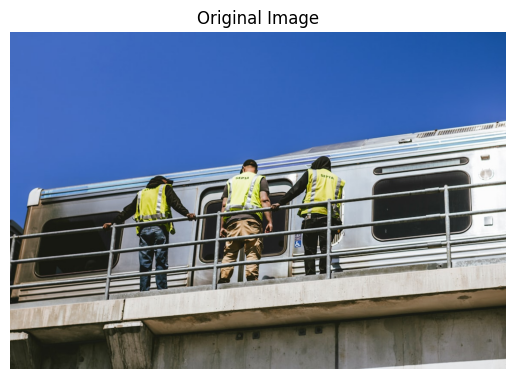

In [69]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


url = "https://images.unsplash.com/photo-1731950997421-f23a96967e1e?q=80&w=1154&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

# Fetch image
response = requests.get(url)
img_pil = Image.open(BytesIO(response.content))   # Load with PIL first

# Convert PIL -> OpenCV (BGR)
img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# Save as ASG3.JPG
cv2.imwrite("results/ASG3.jpg", img)

# Display inline with matplotlib (convert back to RGB for display)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

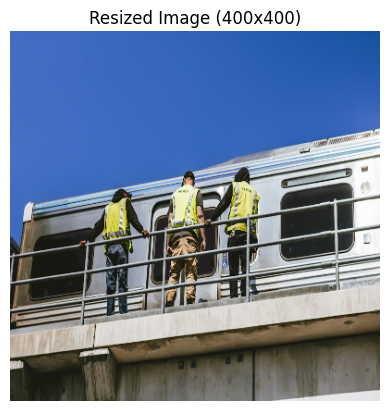

In [70]:
# Resize image
resized_img_400 = cv2.resize(img, (400, 400))

# Save resized image
cv2.imwrite("results/ASG3-resized.jpg", resized_img_400)

# Display
resized_rgb_400 = cv2.cvtColor(resized_img_400, cv2.COLOR_BGR2RGB)
plt.imshow(resized_rgb_400)
plt.title("Resized Image (400x400)")
plt.axis("off")
plt.show()

In [71]:
# Split channels
b_channel, g_channel, r_channel = cv2.split(img)

# Check shapes
print("B channel shape:", b_channel.shape)
print("G channel shape:", g_channel.shape)
print("R channel shape:", r_channel.shape)

B channel shape: (784, 1154)
G channel shape: (784, 1154)
R channel shape: (784, 1154)


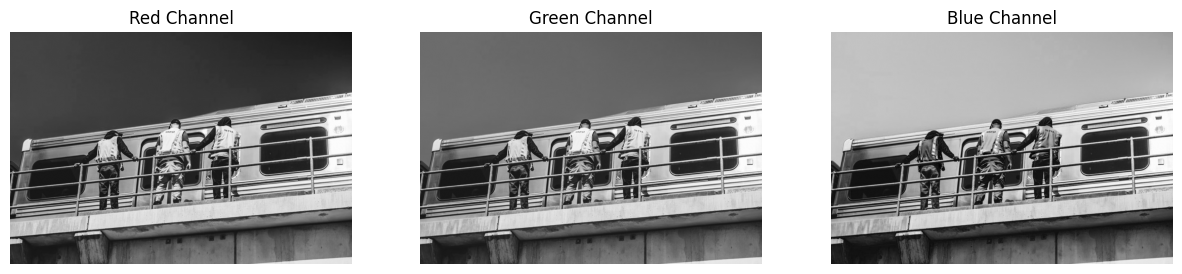

In [72]:
# Show the individual channels
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].imshow(r_channel, cmap="gray")
axs[0].set_title("Red Channel")
axs[0].axis("off")


axs[1].imshow(g_channel, cmap="gray")
axs[1].set_title("Green Channel")
axs[1].axis("off")

axs[2].imshow(b_channel, cmap="gray")
axs[2].set_title("Blue Channel")
axs[2].axis("off")

plt.show()

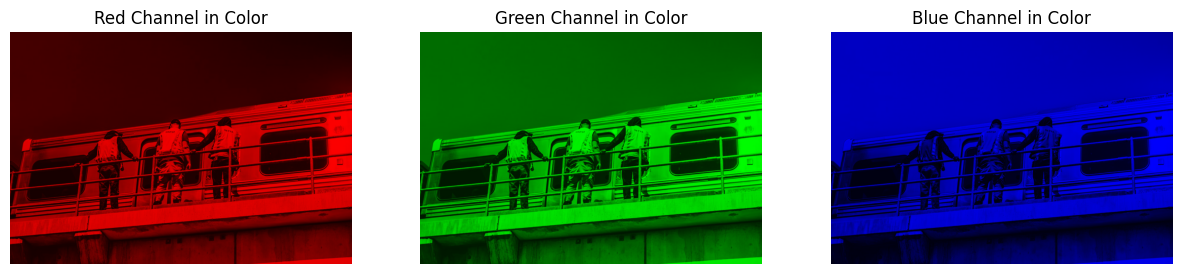

In [73]:
# Create blank channel
zeros = cv2.merge([b_channel*0, g_channel*0, r_channel*0])

# Rebuild images with only one channel active
red_only   = cv2.merge([b_channel*0, g_channel*0, r_channel])
green_only = cv2.merge([b_channel*0, g_channel,   r_channel*0])
blue_only  = cv2.merge([b_channel,   g_channel*0, r_channel*0])

# Convert BGR->RGB for display
red_only   = cv2.cvtColor(red_only, cv2.COLOR_BGR2RGB)
green_only = cv2.cvtColor(green_only, cv2.COLOR_BGR2RGB)
blue_only  = cv2.cvtColor(blue_only, cv2.COLOR_BGR2RGB)

# Show them
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].imshow(red_only)
axs[0].set_title("Red Channel in Color")
axs[0].axis("off")

axs[1].imshow(green_only)
axs[1].set_title("Green Channel in Color")
axs[1].axis("off")

axs[2].imshow(blue_only)
axs[2].set_title("Blue Channel in Color")
axs[2].axis("off")

plt.savefig("results/ASG3-channels.jpg", format="jpg", dpi=300) 
plt.show()

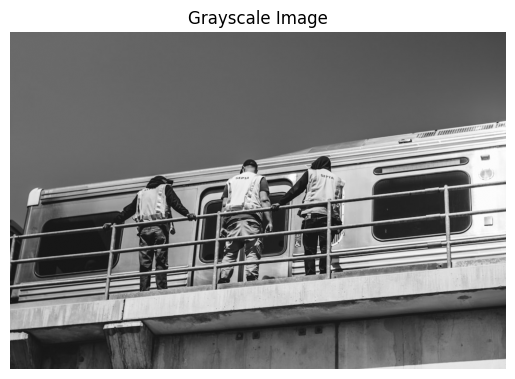

In [74]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display grayscale
plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.savefig("results/ASG3-grayscale.jpg") 
plt.show()

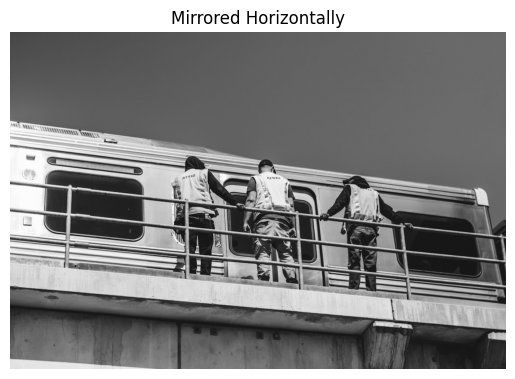

In [75]:
# Mirror horizontally (flip code = 1 → horizontal flip)
mirrored_img = cv2.flip(gray_img, 1)

# Display mirrored image
plt.imshow(mirrored_img, cmap="gray")
plt.title("Mirrored Horizontally")
plt.axis("off")
plt.savefig("results/ASG3-mirrored.jpg") 
plt.show()

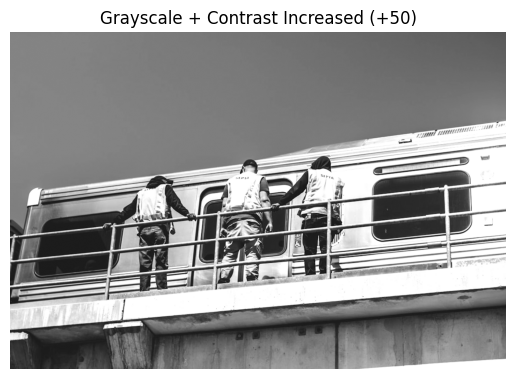

In [76]:
# Increase contrast/brightness by adding 50 to each pixel
contrast_img = cv2.add(gray_img, 50)

# Display contrast-increased image
plt.imshow(contrast_img, cmap="gray")
plt.title("Grayscale + Contrast Increased (+50)")
plt.axis("off")
plt.savefig("results/ASG3-contrast.jpg") 
plt.show()

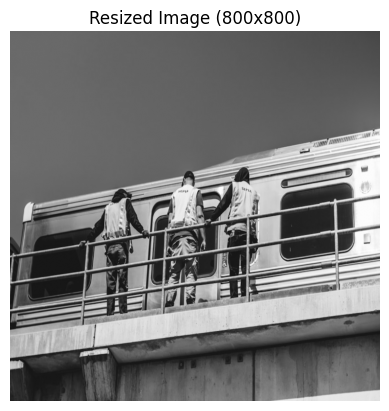

In [77]:
# Resize image
resized_img = cv2.resize(img, (800, 800))


# Display
resized_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
plt.imshow(resized_gray, cmap="gray")
plt.title("Resized Image (800x800)")
plt.axis("off")
plt.savefig("results/ASG3-upscaled.jpg") 
plt.show()

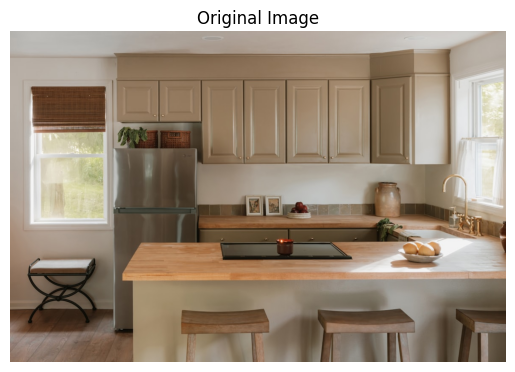

In [78]:

url = "https://images.unsplash.com/photo-1759239572496-4ec13e7643d6?q=80&w=1170&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

# Fetch image
response = requests.get(url)
img_pil = Image.open(BytesIO(response.content))   # Load with PIL first

# Convert PIL -> OpenCV (BGR)
img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# Save as ASG3.JPG
cv2.imwrite("results/5-original.jpg", img)

# Display inline with matplotlib (convert back to RGB for display)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

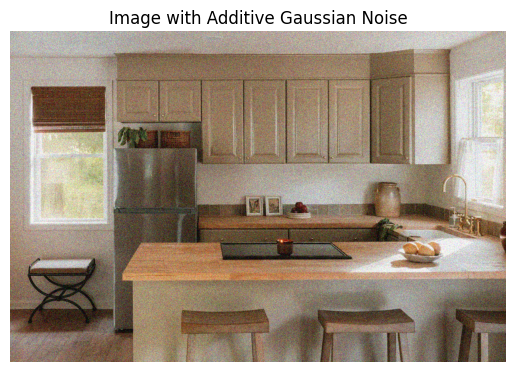

In [79]:
# Parameters for Gaussian noise
mean = 0
stddev = 25   # Standard deviation (higher = more noise)

# Generate Gaussian noise (same size as the image)
gaussian_noise = np.random.normal(mean, stddev, img.shape).astype(np.float32)

# Add the noise to the original image
noisy_img = img.astype(np.float32) + gaussian_noise

# Clip values to stay within valid range [0, 255]
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# Display noisy image (convert BGR to RGB for matplotlib)
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title("Image with Additive Gaussian Noise")
plt.axis("off")
plt.savefig("results/5-noise.jpg") 
plt.show()

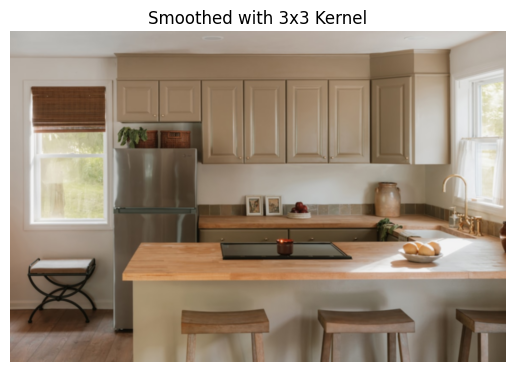

In [80]:
# Apply smoothing filter with 3x3 kernel
smooth_3x3 = cv2.blur(img, (3, 3), )

# Display result
plt.imshow(cv2.cvtColor(smooth_3x3, cv2.COLOR_BGR2RGB))
plt.title("Smoothed with 3x3 Kernel")
plt.axis("off")
plt.savefig("results/5-smooth-3x3.jpg") 
plt.show()

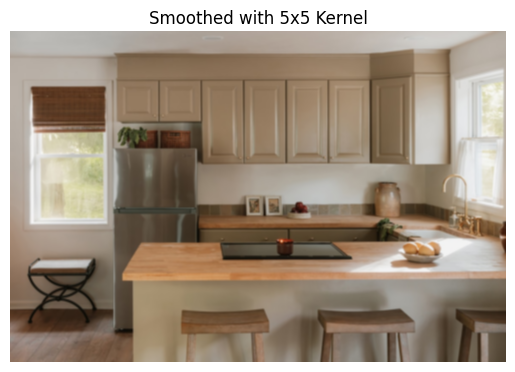

In [81]:
# Apply smoothing filter with 5x5 kernel
smooth_5x5 = cv2.blur(img, (5, 5))

# Display result
plt.imshow(cv2.cvtColor(smooth_5x5, cv2.COLOR_BGR2RGB))
plt.title("Smoothed with 5x5 Kernel")
plt.axis("off")
plt.savefig("results/5-smooth-5x5.jpg") 
plt.show()

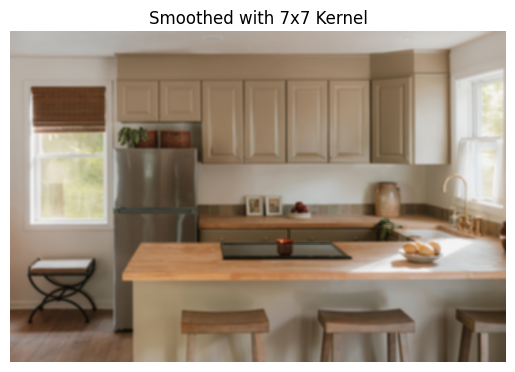

In [82]:
# Apply smoothing filter with 7x7 kernel
smooth_7x7 = cv2.blur(img, (7, 7))

# Display result
plt.imshow(cv2.cvtColor(smooth_7x7, cv2.COLOR_BGR2RGB))
plt.title("Smoothed with 7x7 Kernel")
plt.axis("off")
plt.savefig("results/5-smooth-7x7.jpg") 
plt.show()

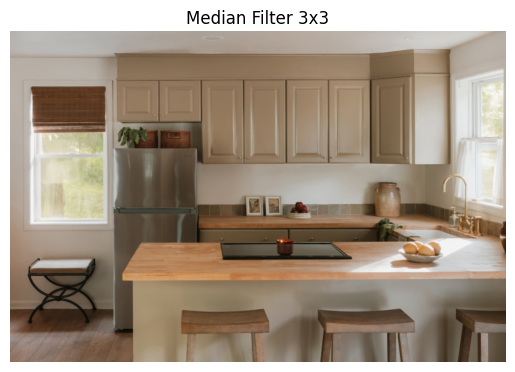

In [83]:
# Apply median filter with 3x3 kernel
median_3x3 = cv2.medianBlur(img, 3)

# Display result
plt.imshow(cv2.cvtColor(median_3x3, cv2.COLOR_BGR2RGB))
plt.title("Median Filter 3x3")
plt.axis("off")
plt.savefig("results/5-median-3x3.jpg") 
plt.show()

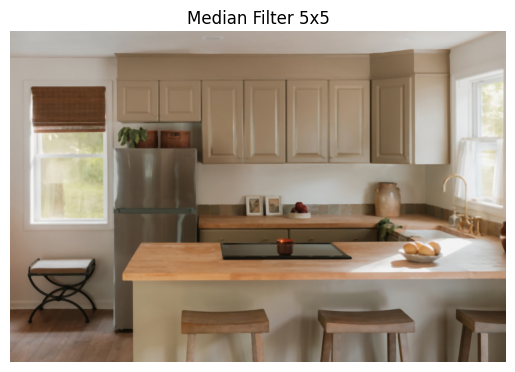

In [84]:
# Apply median filter with 5x5 kernel
median_5x5 = cv2.medianBlur(img, 5)

# Display result
plt.imshow(cv2.cvtColor(median_5x5, cv2.COLOR_BGR2RGB))
plt.title("Median Filter 5x5")
plt.axis("off")
plt.savefig("results/5-median-5x5.jpg") 
plt.show()

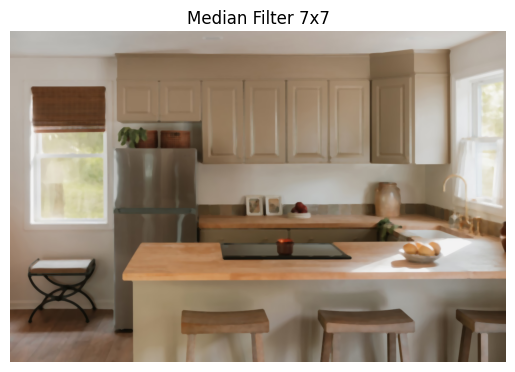

In [85]:
# Apply median filter with 7x7 kernel
median_7x7 = cv2.medianBlur(img, 7)

# Display result
plt.imshow(cv2.cvtColor(median_7x7, cv2.COLOR_BGR2RGB))
plt.title("Median Filter 7x7")
plt.axis("off")
plt.savefig("results/5-median-7x7.jpg") 
plt.show()

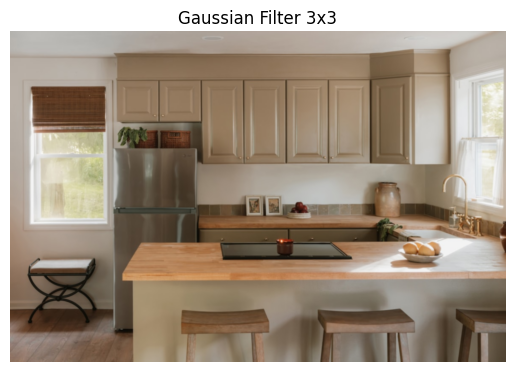

In [86]:
# Apply Gaussian filter with 3x3 kernel
gaussian_3x3 = cv2.GaussianBlur(img, (3, 3), 0)

# Display result
plt.imshow(cv2.cvtColor(gaussian_3x3, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Filter 3x3")
plt.axis("off")
plt.savefig("results/5-gaussian-3x3.jpg") 
plt.show()

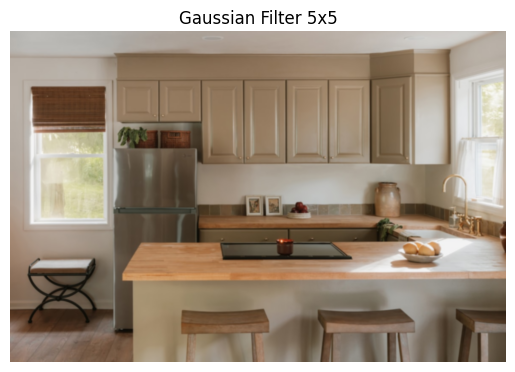

In [87]:
# Apply Gaussian filter with 5x5 kernel
gaussian_5x5 = cv2.GaussianBlur(img, (5, 5), 0)

# Display result
plt.imshow(cv2.cvtColor(gaussian_5x5, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Filter 5x5")
plt.axis("off")
plt.savefig("results/5-gaussian-5x5.jpg") 
plt.show()

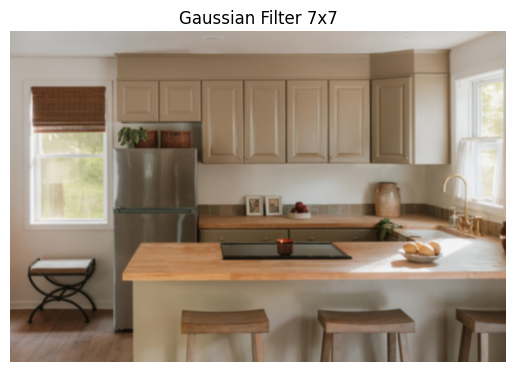

In [88]:
# Apply Gaussian filter with 7x7 kernel
gaussian_7x7 = cv2.GaussianBlur(img, (7, 7), 0)

# Display result
plt.imshow(cv2.cvtColor(gaussian_7x7, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Filter 7x7")
plt.axis("off")
plt.savefig("results/5-gaussian-7x7.jpg") 
plt.show()

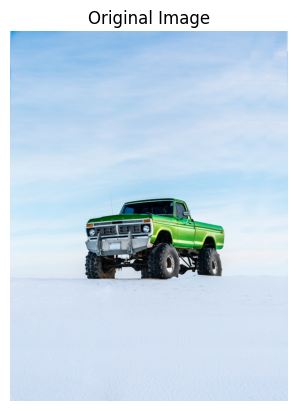

In [89]:
url = "https://images.unsplash.com/photo-1486326658981-ed68abe5868e?q=80&w=735&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

# Fetch image
response = requests.get(url)
img_pil = Image.open(BytesIO(response.content))   # Load with PIL first

# Convert PIL -> OpenCV (BGR)
img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# Save as ASG3.JPG
cv2.imwrite("results/6-original.JPG", img)

# Display inline with matplotlib (convert back to RGB for display)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

In [90]:
def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    """
    Add Salt & Pepper noise to an image.
    salt_prob: probability of salt noise
    pepper_prob: probability of pepper noise
    """
    noisy_img = image.copy()
    
    # Salt noise
    num_salt = np.ceil(salt_prob * image.size / 3)  # divide by 3 for channels
    coords = [np.random.randint(0, i-1, int(num_salt)) for i in image.shape[:2]]
    noisy_img[coords[0], coords[1], :] = 255
    
    # Pepper noise
    num_pepper = np.ceil(pepper_prob * image.size / 3)
    coords = [np.random.randint(0, i-1, int(num_pepper)) for i in image.shape[:2]]
    noisy_img[coords[0], coords[1], :] = 0
    
    return noisy_img

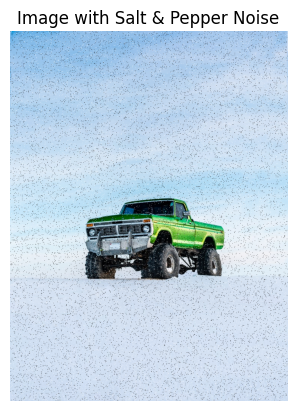

(980, 735, 3)

In [ ]:
# Apply Salt & Pepper noise
sp_noisy_img = add_salt_and_pepper_noise(img, salt_prob=0.02, pepper_prob=0.02)

# Display the noisy image
plt.imshow(cv2.cvtColor(sp_noisy_img, cv2.COLOR_BGR2RGB))
plt.title("Image with Salt & Pepper Noise")
plt.axis("off")
plt.savefig("results/6-noise.JPG", bbox_inches='tight', pad_inches=0)
plt.show()

In [92]:
# Function to pad image with zeros
def zero_pad_image(image, pad_size):
    return cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size,
                              borderType=cv2.BORDER_CONSTANT, value=0)

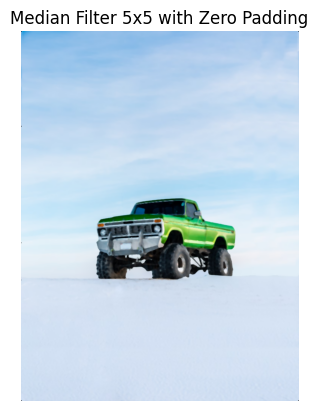

(980, 735, 3)

In [ ]:
# Kernel size
k = 5
pad_size = k // 2  # 5x5 kernel → pad 2 pixels

# Pad the Salt & Pepper noisy image with zeros
sp_noisy_padded = zero_pad_image(sp_noisy_img, pad_size)

# Apply median filter
median_filtered = cv2.medianBlur(sp_noisy_padded, k)

# Crop back to original size to remove padding effect
median_filtered_cropped = median_filtered[pad_size:-pad_size, pad_size:-pad_size]

# Display result
plt.imshow(cv2.cvtColor(median_filtered_cropped, cv2.COLOR_BGR2RGB))
plt.title("Median Filter 5x5 with Zero Padding")
plt.axis("off")
plt.savefig("results/6-median.jpg") 
plt.show()

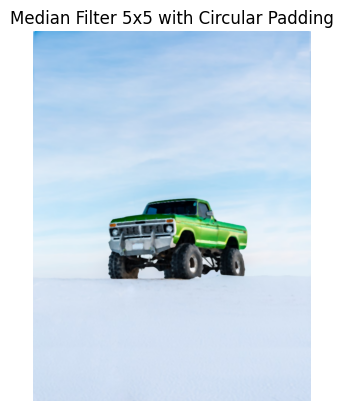

In [94]:
# Kernel size
k = 5
pad_size = k // 2  # 5x5 kernel → pad 2 pixels

# Pad the Salt & Pepper noisy image using circular (wrap-around) padding
sp_noisy_padded = cv2.copyMakeBorder(sp_noisy_img, pad_size, pad_size, pad_size, pad_size, borderType=cv2.BORDER_WRAP)

# Apply median filter to padded image
median_filtered = cv2.medianBlur(sp_noisy_padded, k)

# Crop back to original size
median_filtered_cropped = median_filtered[pad_size:-pad_size, pad_size:-pad_size]

# Display the result
plt.imshow(cv2.cvtColor(median_filtered_cropped, cv2.COLOR_BGR2RGB))
plt.title("Median Filter 5x5 with Circular Padding")
plt.axis("off")
plt.savefig("results/6-median-circular.jpg")
plt.show()

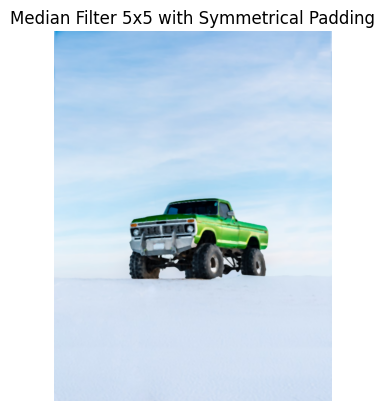

In [95]:
# Kernel size
k = 5
pad_size = k // 2  # 5x5 kernel → pad 2 pixels

# Pad the Salt & Pepper noisy image using symmetrical (reflect) padding
sp_noisy_padded = cv2.copyMakeBorder(sp_noisy_img, pad_size, pad_size, pad_size, pad_size,
                                     borderType=cv2.BORDER_REFLECT)

# Apply median filter to the padded image
median_filtered = cv2.medianBlur(sp_noisy_padded, k)

# Crop back to original size
median_filtered_cropped = median_filtered[pad_size:-pad_size, pad_size:-pad_size]

# Display the result
plt.imshow(cv2.cvtColor(median_filtered_cropped, cv2.COLOR_BGR2RGB))
plt.title("Median Filter 5x5 with Symmetrical Padding")
plt.axis("off")
plt.savefig("results/6-median-symmetrical.jpg")
plt.show()

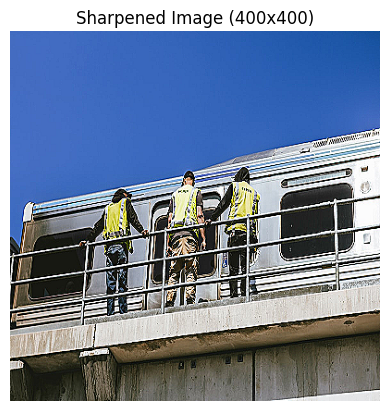

In [96]:
# Define sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]], dtype=np.float32)

# Apply sharpening filter
sharpened_img = cv2.filter2D(resized_img_400, -1, sharpen_kernel)

# Display result
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image (400x400)")
plt.axis("off")
plt.savefig("results/6-sharpened.jpg")
plt.show()

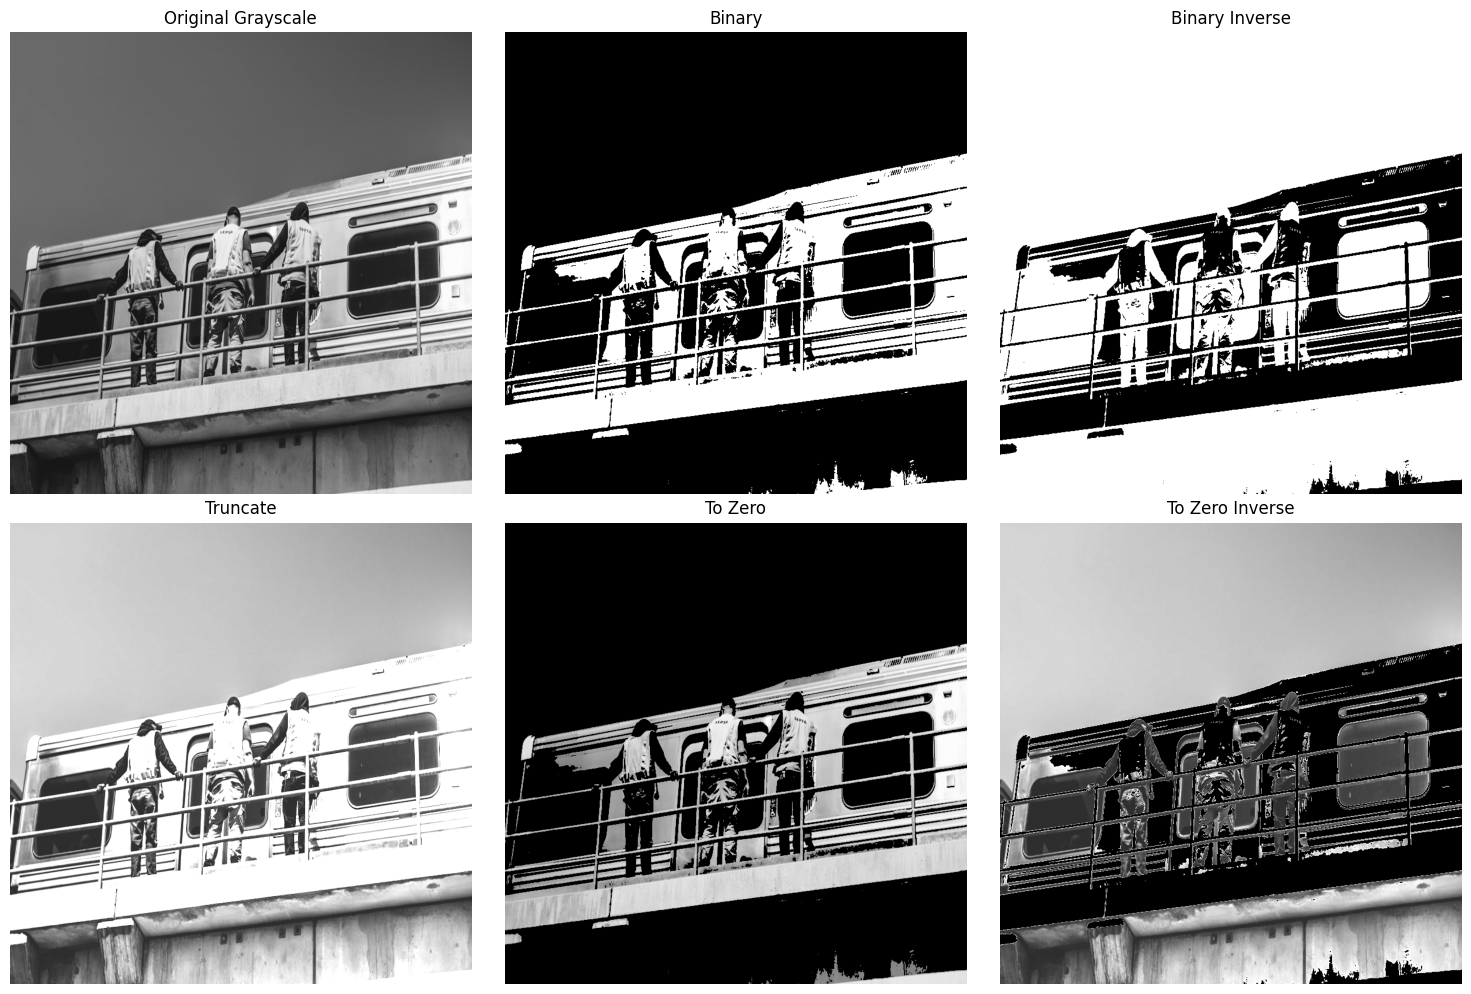

In [97]:
# Apply different thresholding techniques (come with opencv) on resized image
_, thresh_binary = cv2.threshold(resized_gray, 127, 255, cv2.THRESH_BINARY) # Traditional Binary Thresholding
_, thresh_binary_inv = cv2.threshold(resized_gray, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_trunc = cv2.threshold(resized_gray, 127, 255, cv2.THRESH_TRUNC)
_, thresh_tozero = cv2.threshold(resized_gray, 127, 255, cv2.THRESH_TOZERO)
_, thresh_tozero_inv = cv2.threshold(resized_gray, 127, 255, cv2.THRESH_TOZERO_INV)

# Save thresholded images
cv2.imwrite("results/ASG3-thresh-binary.jpg", thresh_binary)
cv2.imwrite("results/ASG3-thresh-binary-inv.jpg", thresh_binary_inv)
cv2.imwrite("results/ASG3-thresh-trunc.jpg", thresh_trunc)
cv2.imwrite("results/ASG3-thresh-tozero.jpg", thresh_tozero)
cv2.imwrite("results/ASG3-thresh-tozero-inv.jpg", thresh_tozero_inv)

# Display results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0,0].imshow(resized_gray, cmap="gray")
axs[0,0].set_title("Original Grayscale")
axs[0,0].axis("off")

axs[0,1].imshow(thresh_binary, cmap="gray")
axs[0,1].set_title("Binary")
axs[0,1].axis("off")

axs[0,2].imshow(thresh_binary_inv, cmap="gray")
axs[0,2].set_title("Binary Inverse")
axs[0,2].axis("off")

axs[1,0].imshow(thresh_trunc, cmap="gray")
axs[1,0].set_title("Truncate")
axs[1,0].axis("off")

axs[1,1].imshow(thresh_tozero, cmap="gray")
axs[1,1].set_title("To Zero")
axs[1,1].axis("off")

axs[1,2].imshow(thresh_tozero_inv, cmap="gray")
axs[1,2].set_title("To Zero Inverse")
axs[1,2].axis("off")

plt.tight_layout()
plt.show()